In [1]:
import os
import argparse
from os.path import join
import cv2
import json
import seaborn as sns
from PIL import Image as pil_image
from PIL import Image
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
metadata = pd.read_json('metadata.json').T
print(len(metadata))
print(len(metadata[metadata.label == "REAL"]),len(metadata[metadata.label == "FAKE"]))

400
77 323


In [3]:
print(metadata.head())

               label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4


In [4]:
sns.set(style="darkgrid")

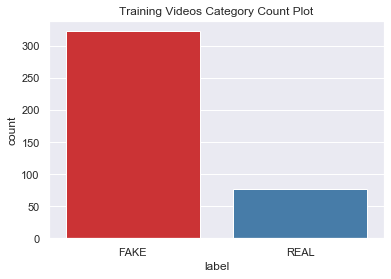

In [5]:
sns_plot = sns.countplot(x="label", data=metadata, palette="Set1").set_title('Training Videos Category Count Plot')

In [6]:
whole_label = pd.read_csv('idx_label.csv')
y_true_label = whole_label['File_Label']
y_generated_label = whole_label['Machine_Label']
a1 = dict(Counter(y_true_label))
a2 = dict(Counter(y_generated_label))
print(a1)
print(a2)

{0: 28245, 1: 7230}
{1: 10331, 0: 25144}


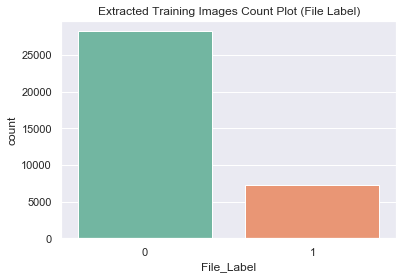

In [7]:
sns_plot = sns.countplot(x="File_Label", data=whole_label, palette="Set2").set_title('Extracted Training Images Count Plot (File Label)')


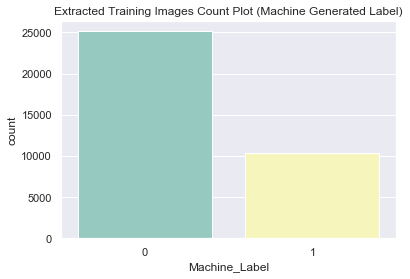

In [8]:
sns_plot = sns.countplot(x="Machine_Label", data=whole_label, palette="Set3").set_title('Extracted Training Images Count Plot (Machine Generated Label)')

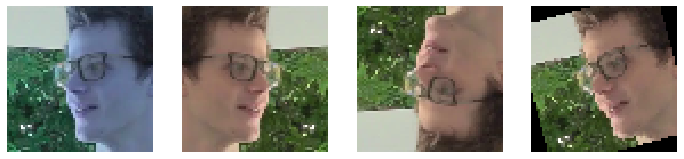

In [78]:
# Data Augmentation Visualization
im = Image.open('1.png')
hoz_flip = im.transpose(Image.FLIP_LEFT_RIGHT)
hoz_flip = np.array(hoz_flip)
cv2.imwrite('2.png', hoz_flip)
ver_flip = im.transpose(Image.FLIP_TOP_BOTTOM)
ver_flip = np.array(ver_flip)
cv2.imwrite('3.png', ver_flip)
rot_fli = im.rotate(15)
rot_fli = np.array(rot_fli)
cv2.imwrite('4.png', rot_fli)
plt.figure(figsize = (12,12))
for i in range(1,5): 
    image = cv.imread("%d.png" % i)

    plt.subplot(1, 4, i), plt.imshow(image), plt.grid(b=None), plt.axis('off')
plt.savefig('Data Augmentation (1*4).jpg') # To save figure
plt.show()

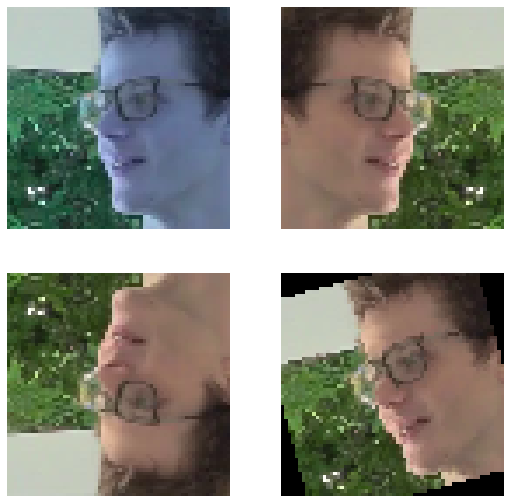

In [77]:
plt.figure(figsize = (9,9))
for i in range(1,5): 
    image = cv.imread("%d.png" % i)
    plt.subplot(2, 2, i), plt.imshow(image), plt.grid(b=None),  plt.axis('off')
plt.savefig('Data Augmentation (2*2).jpg') # To save figure
plt.show()

In [36]:
process1 = pd.read_csv('basic_cnn_train_with_generated_label_imbalance.csv')

In [12]:
process2 = pd.read_csv('basic_cnn_train_with_generated_label.csv')


In [13]:
process3 = pd.read_csv('basic_cnn_train_with_true_label_imbalance.csv')


In [14]:
process4 = pd.read_csv('basic_cnn_train_with_true_label.csv')

Text(0, 0.5, 'Acc')

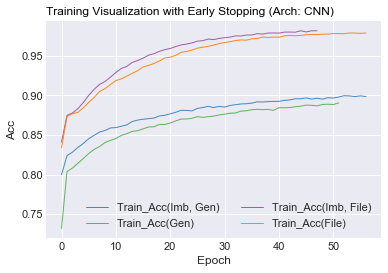

In [15]:
df=pd.DataFrame({'x': process1['Epoch'], 'Train_Acc(Imb, Gen)': process1['Train_Acc'], 'Train_Acc(Gen)': process2['Train_Acc'], 'Train_Acc(Imb, File)': process3['Train_Acc'], 'Train_Acc(File)': process4['Train_Acc'] })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc='lower right', ncol=2)
 
# Add titles
plt.title("Training Visualization with Early Stopping (Arch: CNN)", loc='left', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Epoch")
plt.ylabel("Acc")

Text(0, 0.5, 'Acc')

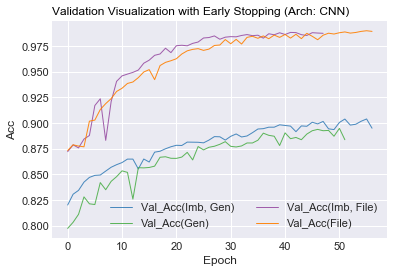

In [16]:
df=pd.DataFrame({'x': process1['Epoch'], 'Val_Acc(Imb, Gen)': process1['Val_Acc'], 'Val_Acc(Gen)': process2['Val_Acc'], 'Val_Acc(Imb, File)': process3['Val_Acc'], 'Val_Acc(File)': process4['Val_Acc'] })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc='lower right', ncol=2)
 
# Add titles
plt.title("Validation Visualization with Early Stopping (Arch: CNN)", loc='left', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Epoch")
plt.ylabel("Acc")

In [17]:
process5 = pd.read_csv('basic_dense_train_with_generated_label_imbalance.csv')

In [18]:
process6 = pd.read_csv('basic_dense_train_with_generated_label.csv')

In [19]:
process7 = pd.read_csv('basic_dense_train_with_true_label_imbalance.csv')

In [20]:
process8 = pd.read_csv('basic_dense_train_with_true_label.csv')

Text(0, 0.5, 'Acc')

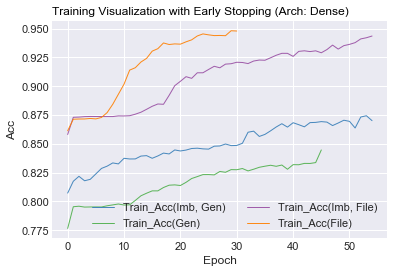

In [79]:
df=pd.DataFrame({'x': process5['Epoch'], 'Train_Acc(Imb, Gen)': process5['Train_Acc'], 'Train_Acc(Gen)': process6['Train_Acc'], 'Train_Acc(Imb, File)': process7['Train_Acc'], 'Train_Acc(File)': process8['Train_Acc'] })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc='lower right', ncol=2)
 
# Add titles
plt.title("Training Visualization with Early Stopping (Arch: Dense)", loc='left', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Epoch")
plt.ylabel("Acc")

Text(0, 0.5, 'Acc')

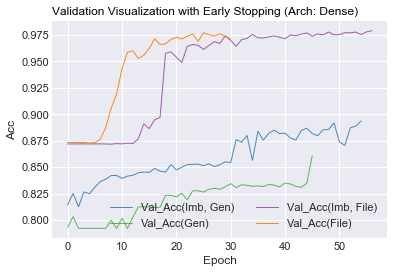

In [45]:
df=pd.DataFrame({'x': process1['Epoch'], 'Val_Acc(Imb, Gen)': process5['Val_Acc'], 'Val_Acc(Gen)': process6['Val_Acc'], 'Val_Acc(Imb, File)': process7['Val_Acc'], 'Val_Acc(File)': process8['Val_Acc'] })
 
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc='lower right', ncol=2)
 
# Add titles
plt.title("Validation Visualization with Early Stopping (Arch: Dense)", loc='left', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Epoch")
plt.ylabel("Acc")

In [38]:
# Extracted Face Visualization Output
import cv2
vidcap = cv2.VideoCapture('cekwtyxdoo.avi')
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  success,image = vidcap.read()
  count += 1

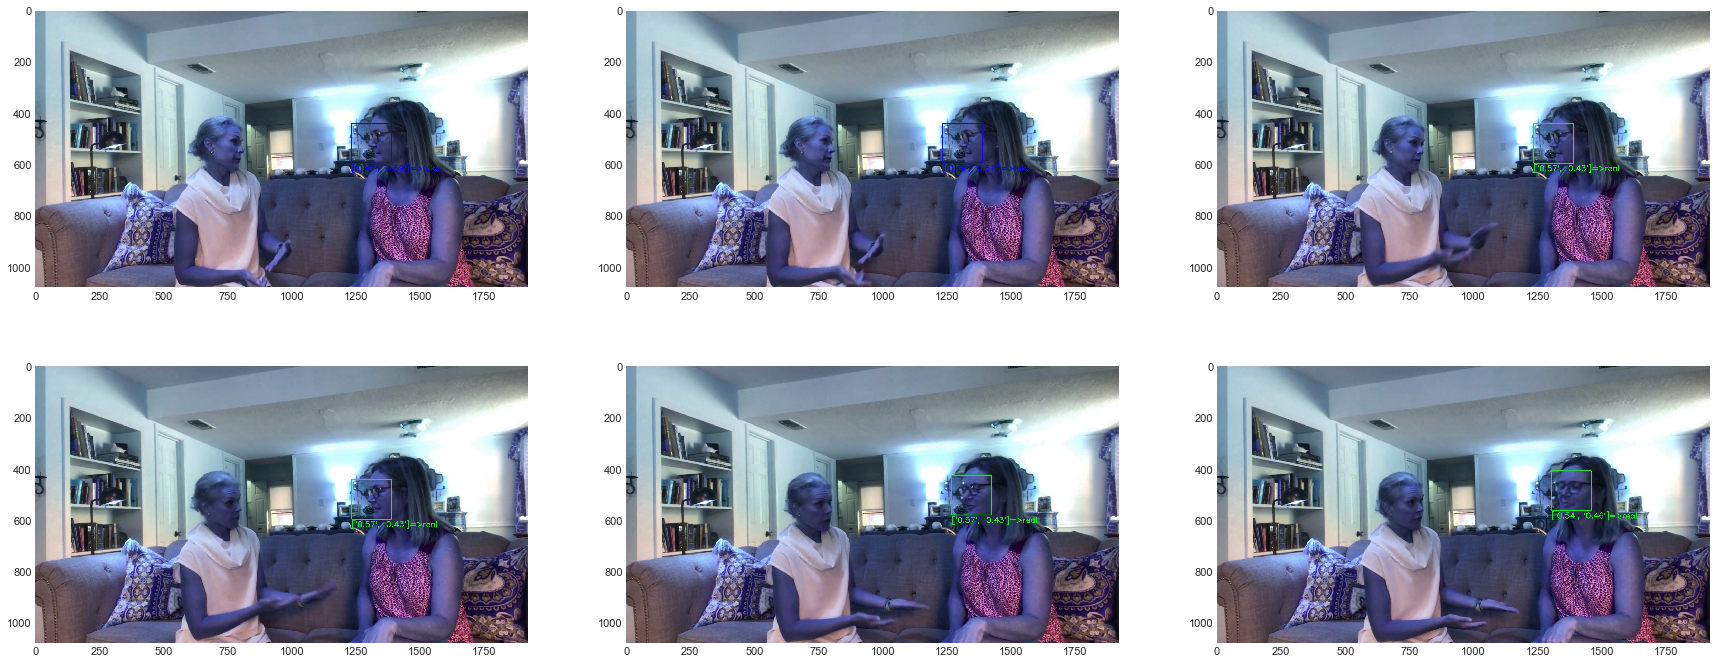

In [52]:
import cv2 as cv
from matplotlib import pyplot as plt
plt.figure(figsize = (30,12))
for i in range(1,7): 
    j = 4*i
    image = cv.imread("frame%d.jpg" % j)
    plt.subplot(2, 3, i), plt.imshow(image), plt.grid(b=None)
plt.savefig('final_image_name.jpg') # To save figure
plt.show()

In [23]:
process9 = pd.read_csv('Resnet50_train_with_generated_label_none.csv')

In [24]:
process10 = pd.read_csv('Resnet50_train_with_generated_label.csv')

In [25]:
process11 = pd.read_csv('Resnet50_train_with_true_label_none.csv')

In [26]:
process12 = pd.read_csv('Resnet50_train_with_true_label.csv')

In [27]:
process13 = pd.read_csv('Resnet101_train_with_generated_label_none.csv')

In [28]:
process14 = pd.read_csv('Resnet101_train_with_generated_label.csv')

In [29]:
process15 = pd.read_csv('Resnet101train_with_true_label.csv')

In [30]:
process16 = pd.read_csv('Resnet101_train_with_true_label_none.csv')

In [31]:
process17 = pd.read_csv('VGG16_train_with_generated_label_imbalance.csv')

In [32]:
process18 = pd.read_csv('VGG16_train_with_generated_label.csv')

In [33]:
process19 = pd.read_csv('VGG16_train_with_true_label_imbalance.csv')

In [35]:
process20 = pd.read_csv('VGG16_train_with_true_label.csv')